# Import software libraries and load the dataset #

In [1]:
# Import required libraries.
import sys                             # Read system parameters.
import shutil
import numpy as np                     # Work with multi-dimensional arrays and matrices.
from numpy.random import seed
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import sklearn                         # Perform data mining and analysis.
import tensorflow                      # Train neural networks for deep learning.
import keras                           # Provide a frontend for TensorFlow.
from keras import datasets
from keras.utils import to_categorical,plot_model
from keras.models import Sequential,Model
from keras.layers import AveragePooling2D, BatchNormalization, Conv2D, MaxPooling2D, Dense, Flatten
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

import pydot


# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- TensorFlow {}'.format(tensorflow.__version__))
print('- Keras {}\n'.format(keras.__version__))

# Load the dataset.
#shutil.rmtree('/home/jovyan/.keras')
#shutil.copytree('/home/jovyan/work/.keras', '/home/jovyan/.keras')
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print('Loaded {} training records.'.format(len(X_train.data)))
print('Loaded {} test records.'.format(len(X_test.data)))

# Uncomment the following two lines to make outcomes deterministic. Supply whatever seed values you wish.
seed(1)
tensorflow.random.set_seed(1)

Libraries used in this project:
- Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.19.2
- Matplotlib 3.3.2
- scikit-learn 0.23.2
- TensorFlow 2.4.0
- Keras 2.4.3

Loaded 60000 training records.
Loaded 10000 test records.


# Get acquainted with the dataset

In [2]:
# Show dimensions of the training and testing sets and their labels
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
X_train[0].shape

(28, 28)

# Visualize the data examples

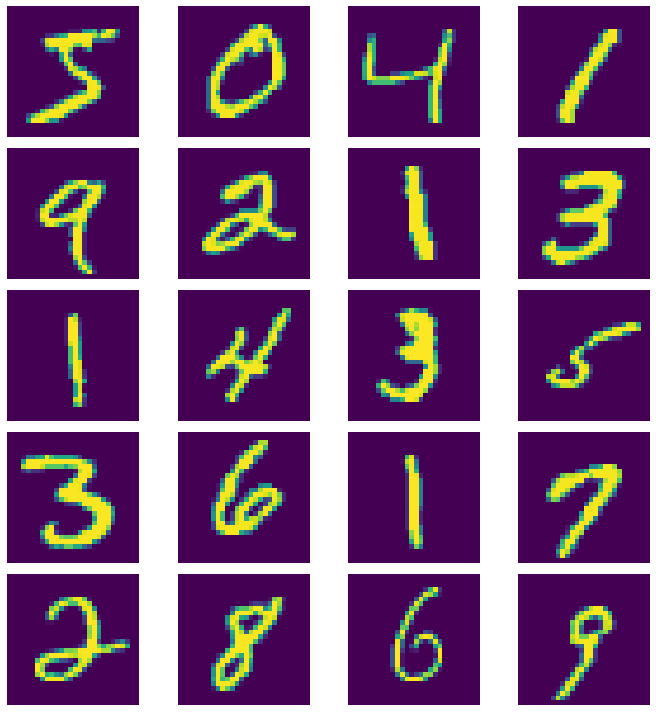

In [4]:
# Show a preview of the first 20 images

W = 4
L = 5

fig, axes = plt.subplots(nrows=L, ncols=W, figsize=(10,10))

axes = axes.ravel()

n_training = len(X_train)


for i in range(W*L):
    index = np.arange(0, n_training)
    axes[i].imshow(X_train[i])
    #axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis("off")
    
#plt.subplots_adjust(hspace=0.1)
plt.tight_layout()

# Prepare the data for training with Keras

In [5]:
# Reshape arrays to add greyscale flag.

# One-hot encode the data for each label.


In [6]:
X_train = X_train.reshape(-1,28,28,1)

In [7]:
X_test = X_test.reshape(-1,28,28,1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train_scaled = X_train.astype('float')/255.

In [10]:
X_test_scaled = X_test.astype('float')/255.

In [11]:
y_train_encoded = to_categorical(y_train)

In [12]:
y_test_encoded = to_categorical(y_test)

In [13]:
X_train_scaled.shape, X_test_scaled.shape, y_train_encoded.shape, y_test_encoded.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [14]:
X_train_scaled[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [15]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Split the datasets

In [16]:
# Split the training and validation datasets and their labels.
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_encoded, random_state = 1)

In [18]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((45000, 28, 28, 1), (15000, 28, 28, 1), (45000, 10), (15000, 10))

# Build the CNN structure

In [19]:
# Import the required libraries.


# Create the model.


# Add model layers as specified.


In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size = (3, 3), input_shape = (28, 28, 1), padding = 'same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(Flatten())

model.add(Dense(512, activation="relu")),
model.add(Dense(10, activation="softmax"))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23328)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               11944448  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 11,949,898
Trainable params: 11,949,898
Non-trainable params: 0
_________________________________________________________________


# Compile the model and summarize the layers

In [22]:
from keras.optimizers import Adam

In [23]:
# Compile the model.
#   - Use the adam optimizer.
#   - Use categorical_crossentropy for the loss function.
#   - Use accuracy to measure model performance.

optimizer = Adam(0.001)

# Summarize the layers.

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Plot a graph of the model

In [24]:
# Install the required library.
#!conda install --yes graphviz==2.40.1

In [25]:
# Plot a graph of the model.


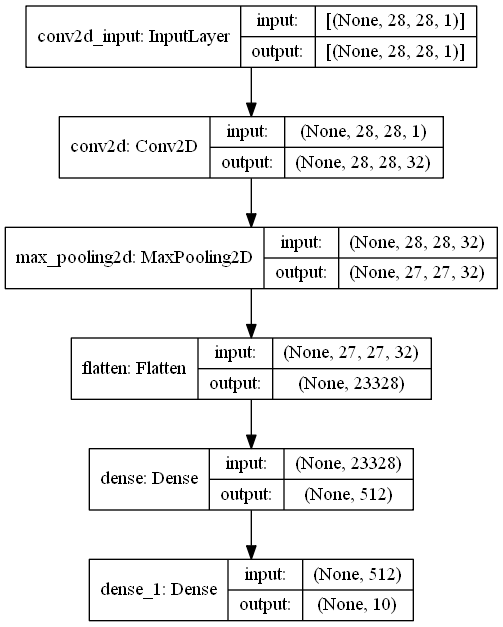

In [26]:
plot_model(model, show_shapes=True)

# Train the model

In [27]:
# Train the model over 1 epoch.
history = model.fit(X_train,y_train, validation_data = (X_val, y_val), steps_per_epoch=100, batch_size=600, epochs=1)

100/100 [==============================] - 77s 763ms/step - loss: 0.5084 - accuracy: 0.8343 - val_loss: 0.1130 - val_accuracy: 0.9674


# Evaluate the model on the test data

In [28]:
# Evaluate the model on the test data, showing loss and accuracy.
model.evaluate(X_test,y_test_encoded,batch_size=600)

17/17 [==============================] - 4s 226ms/step - loss: 23.1272 - accuracy: 0.9471


[23.127225875854492, 0.9470999836921692]

# Make predictions on the test data

In [29]:
# Make predictions on the test data.
#model.predict_classes(X_test_scaled, batch_size=600)

# Show the first 30 examples.


prediction = np.argmax(model.predict(X_test_scaled, batch_size=600),axis=-1)

In [33]:
prediction[:30]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1], dtype=int64)

In [34]:
y_test[:30]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1], dtype=uint8)

# Visualize the predictions for 30 examples

In [35]:
import pandas as pd

In [36]:
pred = pd.DataFrame(prediction[:30],columns=["Prediction"])

In [37]:
actual = pd.DataFrame(y_test[:30],columns=["Actual"])

In [38]:
df = pd.concat([actual,pred],axis=1)

In [39]:
df

,Actual,Prediction
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


### Predict Index on left, Actual Index on right

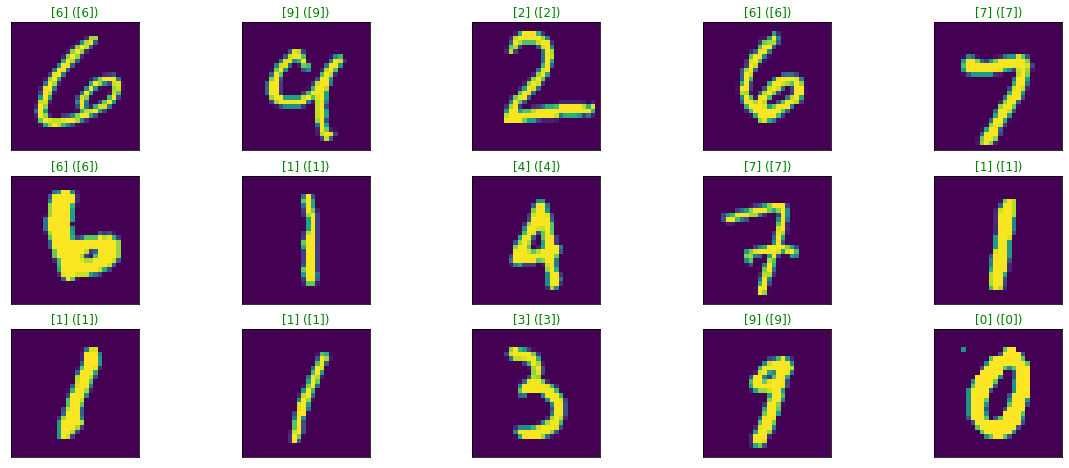

In [40]:
figure = plt.figure(figsize=(20, 8))

for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):

    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Affichez chaque image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = prediction[index]
    true_index = y_test[index]

    # définir le titre de chaque image
    ax.set_title("{} ({})".format(
        [predict_index], 
        [true_index]),
        color=("green" if predict_index == true_index else "red")
    )